# Paris Housing Classification

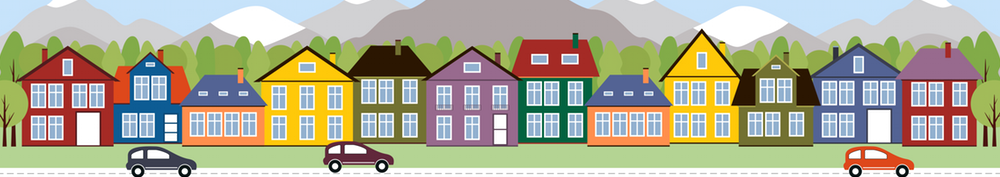

## Introduction

#### Context
This is a set of data created from imaginary data of house prices in an urban environment - Paris. This recommends using this dataset for educational purposes, for practice and to acquire the necessary knowledge.

#### Business Goal: 
According to our context, we have been provided with the dataset, which includes the independent and dependent features, which describes the category of the House is either Basic or Luxury with respect to the independent features.
- As the target variable has two categories , we all know that, it is a classification problem which we usually or most of the time solve by using Logistic Regression model to predict the accuracy of which of the either two categories the house belongs.

So, in short, our Aim is to predict the accuracy of the category of houses in paris urban environment.

That also help us to know which category has the maximum hike in our analysis, so we can also decide that in paris, the particular category houses are more in number, which will be beneficial with the affordable prices.

#### Description
All attributes are numeric variables and they are listed bellow:

- squareMeters
- numberOfRooms
- hasYard
- hasPool
- floors - number of floors
- cityCode - zip code
- cityPartRange - the higher the range, the more exclusive the neighbourhood is
- numPrevOwners - number of prevoious owners
- made - year
- isNewBuilt
- hasStormProtector
- basement - basement square meters
- attic - attic square meteres
- garage - garage size
- hasStorageRoom
- hasGuestRoom - number of guest rooms
- price - price of a house
- category - Luxury or Basic


According to the dataset provided, we have one 'Target Feature'ie; 'category' following with all the independednt features.
As category is divided into two categories ie;
- 1)--- Luxury
- 2)--- Basic

We will then be encoding this two categories , so that it will be a good fit for our Machine Learning model.
So this makes our model a Binary Classification Model.

Moving on further Let's see the basic workflow of our model.
- 1)--- Loading/Reading the dataset
- 2)--- Data Preprocessing/Analysis
- 3)--- Train-Test Split
- 4)--- Standardization of data
- 5)--- Model Training with Logistic Regression
- 6)--- Model Evaluation with Accuracy score,Confusion Matrix and Classification Report.

### Importing Dependencies:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Loading the dataset.

In [2]:
df = pd.read_csv('ParisHousingClass.csv')

In [3]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


#### Data Preprocessing and Analysis:

In [4]:
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
# Checking the missing or null values:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

We observe that our data has no missing values in it.With this we move further with our Statistical measures of the data provided, following with encoding the categorical features.

In [7]:
# Some Statistical measures of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


##### Encoding the Categorical feature.

In [8]:
df['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

Basic     8735
Luxury    1265
Name: category, dtype: int64


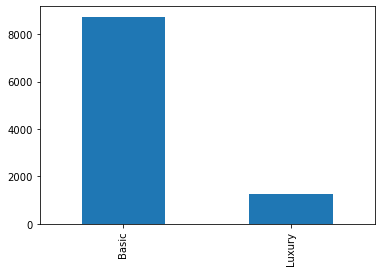

In [9]:
df.category.value_counts().plot(kind='bar')
print(df.category.value_counts())

From the above fig. we observe that, the count of Basic category of house is very high s compared to the Luxurious ones, this might be because Basic category houses are quite affordable to the Luxurious ones.

In [10]:
df.replace({'category':{'Basic':0,'Luxury':1}}, inplace = True)

In [11]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


# 

While encoding the target feature categories we notice that, the distribution of the categories were like,the count of Luxury houses were less as compared to the Basic housing. So, we try to encode the categories of the categorical features as:
- Basic = 0  and 
- Luxury = 1

#### Checking the correlation of the features.

In [12]:
##checking the correlation:
df.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,-0.011800
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591,-0.000442
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119,0.373987
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070,0.382995
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.003827
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539,0.003950
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.003171
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.012843
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210,0.005399
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643,0.381237


<AxesSubplot:>

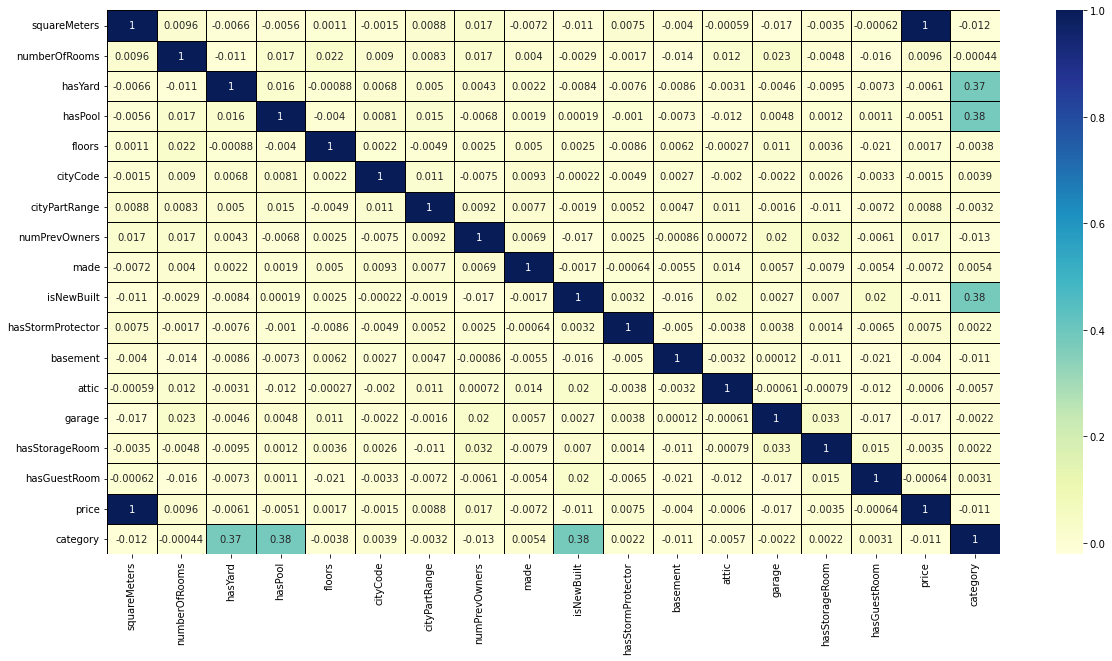

In [13]:
plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(),cmap="YlGnBu", linecolor='black', linewidths= 1,annot= True )

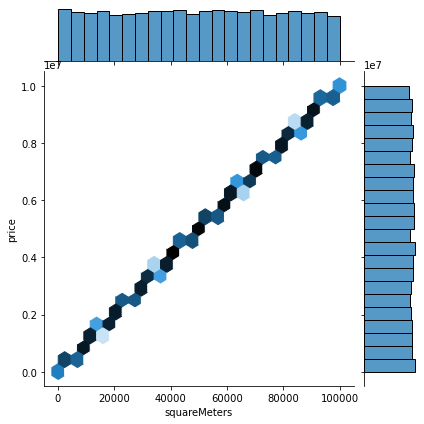

In [14]:
sns.jointplot(x ='squareMeters',y='price',data= df, kind = 'hex')

According to our heatmap we noticed the correlation between the squareMeters and Price, with wwhich we can say that Price and square meter depends on each other ie; As the area(sqM) of house increases, there will be an increase in the price simultaneously.

#### Data Visualization

<AxesSubplot:xlabel='category', ylabel='price'>

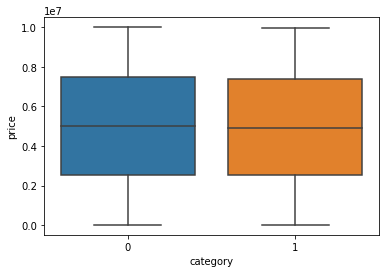

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='category',y='price',data=df)

From the above fig,we observe that, The price for both the categories of houses lies aproximately between 2.1 million to 7.9 million Euros.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


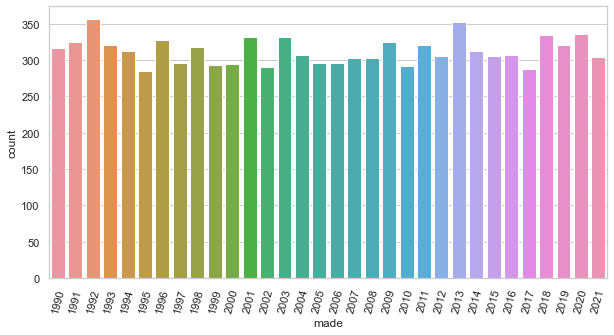

In [16]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 6)
sns.countplot(df['made'])
plt.xticks(rotation=75)
plt.show()

So these are the count of houses which were built in the particular year.

<AxesSubplot:xlabel='made', ylabel='price'>

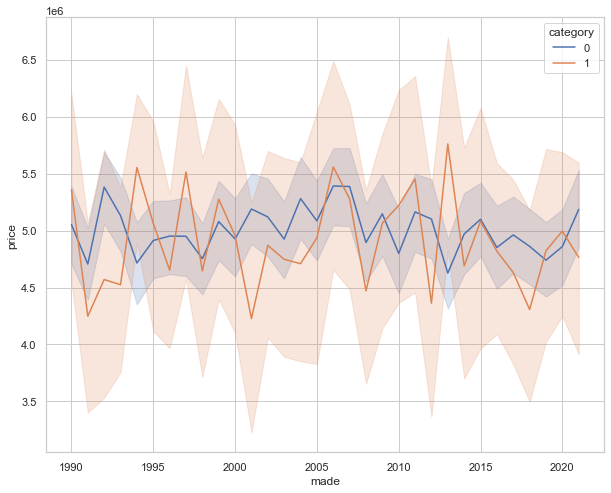

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(x = df["made"], y = df["price"] , hue = df["category"])

From the bove fig. we observe that the Price of the Categories of houses build according to the year.Which specifies, how the prices of the basic and luxurious houses increased or decreased with respect to the year. For example, In the Year 2015 the count of the luxurious houses category with the price approximately of 5.7 million Euros were more in number.

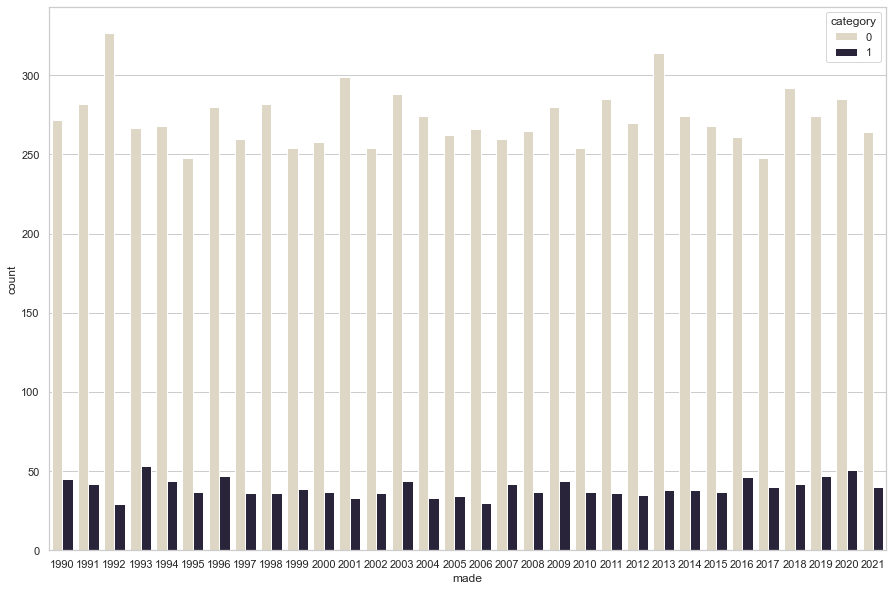

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='made', hue='category',data=df,palette='ch:s=-.2,r=.6')
plt.show()

<AxesSubplot:xlabel='hasYard', ylabel='count'>

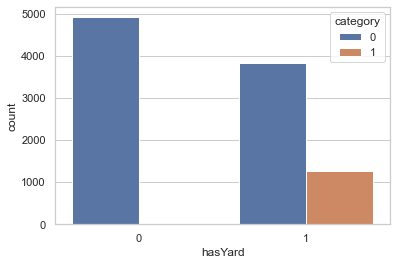

In [19]:
sns.countplot(x='hasYard', hue='category',data=df)

- All luxury hs yard

<AxesSubplot:xlabel='hasStorageRoom', ylabel='count'>

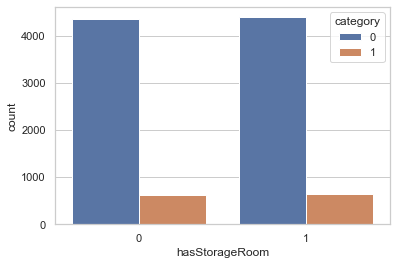

In [20]:
sns.countplot(x='hasStorageRoom', hue='category',data=df)

- There is no effect of storage room on luxury.

<AxesSubplot:xlabel='hasPool', ylabel='count'>

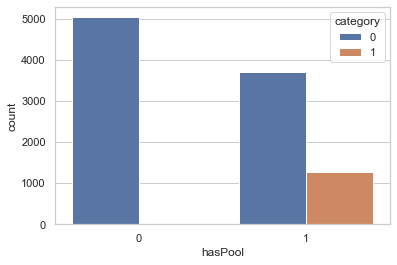

In [21]:
sns.countplot(x='hasPool', hue='category',data=df)

- All luxury has pools and some of the basic too.

<AxesSubplot:xlabel='isNewBuilt', ylabel='count'>

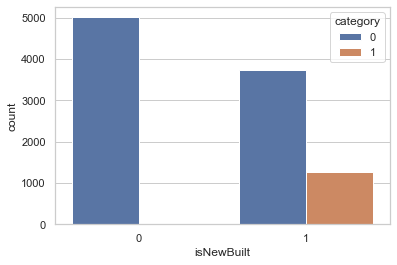

In [22]:
sns.countplot(x='isNewBuilt', hue='category',data=df)

-  All luxury is newly built

##### Splitting the data into x and y features.

In [23]:
x = df.drop(columns='category',axis = 1)
y = df['category']

In [24]:
print(x)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

In [25]:
print(y)

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: category, Length: 10000, dtype: int64




###### Splitting the data into training and test data.


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state = 42)

In [28]:
print(x.shape)
print(y.shape)

(10000, 17)
(10000,)


In [29]:
print('x_train shape is: ',x_train.shape)
print('x_test_Shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

x_train shape is:  (7000, 17)
x_test_Shape is:  (3000, 17)
y_train shape is:  (7000,)
y_test shape is:  (3000,)


#### Model Training
##### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

#### Model Evaluation
###### Accuracy score 

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
x_train_predictions = model.predict(x_train)
train_data_accuracy = accuracy_score(y_train,x_train_predictions)
print('Accuracy score of training data is : ',train_data_accuracy)

Accuracy score of training data is :  0.8752857142857143


In [35]:
x_test_predictions = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_predictions)
print('Accuracy score for the test data is : ',test_data_accuracy)

Accuracy score for the test data is :  0.8693333333333333


Here we trained our model with logistic regression for the normal data which has been provided already without any feature scaling.

Moving on to the Model Evaluation, our outcome as the accuracy score is approx. 88% and 87% in both train and test data respectively. which means our model is working fine with its predictions. ie; the predictions of the category of whether the house is Basic or Luxury is working fine in this model.

### Feature Scaling
##### Standard Scaler

Now here we are going to do the feature scaling or Standardization of data with Standard Scaler.

StandardScaler -  standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale.

It follows the Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit(1) variance. Whereas, MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
model1_scale = StandardScaler()

In [38]:
model1_scale.fit(x_train)

StandardScaler()

In [39]:
model1_scale.fit(x_test)

StandardScaler()

In [40]:
x_train_scaled=model1_scale.transform(x_train)
x_test_scaled =model1_scale.transform(x_test)

In [41]:
x_train_scaled

array([[-1.5722984 ,  0.4930213 ,  0.96076892, ..., -1.01409939,
         1.55256552, -1.57154658],
       [-1.2767445 , -1.41692692, -1.040833  , ..., -1.01409939,
         1.55256552, -1.27876286],
       [-1.57051754, -1.6252849 , -1.040833  , ..., -1.01409939,
        -0.33352339, -1.56867986],
       ...,
       [ 1.63502647,  0.63192662,  0.96076892, ...,  0.98609664,
        -0.33352339,  1.63512042],
       [-1.16157095, -0.13205266,  0.96076892, ..., -1.01409939,
        -0.96221969, -1.16210419],
       [-1.6205528 ,  1.18754792,  0.96076892, ..., -1.01409939,
         1.55256552, -1.61929637]])

In [42]:
x_test_scaled

array([[ 0.97895161, -1.48637958,  0.96076892, ...,  0.98609664,
        -1.27656784,  0.97982352],
       [-0.47676264,  1.01391627,  0.96076892, ..., -1.01409939,
        -0.01917524, -0.47595459],
       [ 1.18179816, -0.47931597,  0.96076892, ...,  0.98609664,
         0.60952106,  1.18141829],
       ...,
       [ 0.04016558,  0.52774763, -1.040833  , ..., -1.01409939,
        -0.01917524,  0.03951465],
       [ 0.26085496, -1.48637958, -1.040833  , ...,  0.98609664,
        -1.27656784,  0.26076223],
       [-0.09281655,  1.53481123, -1.040833  , ...,  0.98609664,
         0.60952106, -0.09329295]])

#### Model Training with Scaled Data

###### Logistic regression with scaled data

In [43]:
model1 = LogisticRegression()

In [44]:
model1.fit(x_train_scaled,y_train)

LogisticRegression()

#### Model Evaluation with standardized data

##### Accuracy Score of scaled data 

In [45]:
# Checking the Accuracy for training data:
x_train_predictions = model1.predict(x_train_scaled)
train_data_accuracy = accuracy_score(y_train,x_train_predictions)
print('Accuracy score of training data is : ',train_data_accuracy)

Accuracy score of training data is :  1.0


In [46]:
# Checking the accuracy for test data:
x_test_predictions = model1.predict(x_test_scaled)
test_data_accuracy = accuracy_score(y_test,x_test_predictions)
print('Accuracy score for the test data is : ',test_data_accuracy)

Accuracy score for the test data is :  1.0


### Confusion Matrix and Classification Report.

##### Confusion Matrix :
It is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. 

##### Classification Report:
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of our trained classification model.

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

- Precision---	Precision is defined as the ratio of true positives to the sum of true and false positives.
- Recall---	Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
- F1 Score---	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
- Support---	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.


In [47]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [48]:
print('\n\n Confusion Matrix\n\n',confusion_matrix(y_test,x_test_predictions))
print('\n=======================================================================\n')
print('\n\n Classification report \n\n',classification_report(y_test,x_test_predictions))



 Confusion Matrix

 [[2608    0]
 [   0  392]]




 Classification report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2608
           1       1.00      1.00      1.00       392

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



##### Plotting the confusion matrix:

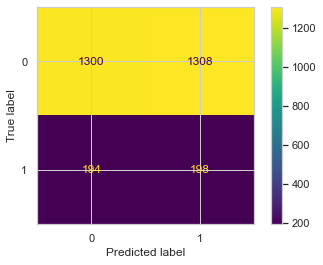

In [49]:
plot_confusion_matrix(model,x_test_scaled,y_test)

Later on continuing the Model Training with Scaled Train data ,we followed up with finding the Accuracy score for standardized data, which has to be in the range of [0 to 1], which subjects to 0- mean and unit - Variance as discussed earlier in the standard scaler definition,that also describes our model is working quite well also with the scaled data.

Moving on further, with the Confusion Matrix and Classification report.We observe that that our false negative and false positive rates are 0 which is exactly what we want for our model to work well, on the other hand it does.
As in our classification report ,the value of precision,recall,and f1-score is 1.0 ,and as discussed earlier the closer the value of the f1-score is to 1.0 , the better the expected performance of the model is. 

Hence we conclude that our model is working well with predictions on predicting whether the houses in paris are Basic or Luxury.